# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_binary_43_review.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,1,0.647155,-1.555300,-1.955019,-1.012432,-0.192863,1.471186,-1.012940,-1.984604,0.483530,...,-1.808111,-1.598462,0.785350,-1.041805,0.073726,-1.072343,-1.425669,-0.106774,-0.296542,-0.036078
1,1,0.672890,-0.482602,-0.401719,0.846203,0.161961,0.735780,-0.034285,0.301053,-0.310323,...,1.209088,-2.688085,0.798333,-0.441933,0.187126,0.098620,-1.725648,-0.172299,-0.479444,-0.884305
2,1,0.608535,0.113706,-1.292885,-0.338812,0.604200,1.032395,-0.566884,0.355974,0.887711,...,-0.648330,-3.009207,-0.047663,-1.440206,-1.344167,-1.294903,-0.910447,-0.821677,0.037457,-0.185145
3,0,0.454426,0.271049,-0.657329,-0.034799,0.437557,1.619529,-1.024691,0.075223,0.338540,...,0.611314,-3.861432,0.563050,-0.030812,-0.180186,-0.938214,-1.575309,-0.762886,-0.587954,-1.328248
4,1,0.466307,-1.383654,-1.946057,-1.142501,0.094552,-0.237099,-2.588735,0.177351,-0.109542,...,0.375221,-2.748083,-0.598856,-1.258993,1.250683,-1.328983,-1.023203,0.135820,-0.323808,-1.980627


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.647155 -1.555300 -1.955019 -1.012432 -0.192863  1.471186 -1.012940   
1    0.672890 -0.482602 -0.401719  0.846203  0.161961  0.735780 -0.034285   
2    0.608535  0.113706 -1.292885 -0.338812  0.604200  1.032395 -0.566884   
3    0.454426  0.271049 -0.657329 -0.034799  0.437557  1.619529 -1.024691   
4    0.466307 -1.383654 -1.946057 -1.142501  0.094552 -0.237099 -2.588735   
..        ...       ...       ...       ...       ...       ...       ...   
176  0.310011 -0.179850 -1.012541 -0.571637  0.374212  1.562726 -0.988234   
177  0.621432  0.132928 -0.598305  0.810830  0.580382  0.185088 -0.805137   
178  0.250650 -0.275175 -0.762910 -0.778135  0.533026  1.283683 -0.809245   
179  0.249858 -0.317195 -0.227729 -0.806603  0.276945  0.922711 -0.215652   
180  0.169740  0.046074 -0.751110 -0.105990  0.496824  0.437686 -0.682648   

            7         8         9  ...        33        34        35  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Mejor estimación de parámetros según GridSearchCV:")
print(clf.best_estimator_)
model = clf.best_estimator_

Mejor estimación de parámetros según GridSearchCV:
RandomForestClassifier(min_samples_split=4, n_estimators=20, random_state=125)


In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))


Best result of the cross validation of the model with the best paramters:0.5982758620689655


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0
yTrain=yTrain.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0
yTest=yTest.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:1.0
Final accuracy on the testing dataset: 0.5405405405405406


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[68  0]
 [ 0 76]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        76

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 6 11]
 [ 6 14]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        17
           1       0.56      0.70      0.62        20

    accuracy                           0.54        37
   macro avg       0.53      0.53      0.52        37
weighted avg       0.53      0.54      0.53        37



Features with relevance over 0:  43
Features with relevance over 0.05:  0


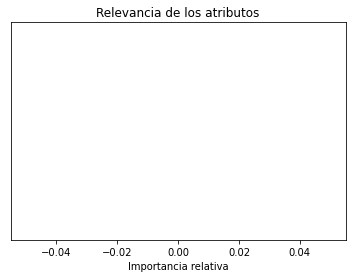

0 = 0.017976913567382662
1 = 0.03256700072768797
2 = 0.028924704959512708
3 = 0.012508649464477332
4 = 0.019900810950726686
5 = 0.043978284743559845
6 = 0.030170069131855697
7 = 0.01082919454165473
8 = 0.03392234623578648
9 = 0.017968806179871868
10 = 0.01705816365020296
11 = 0.017664735114664515
12 = 0.01977726097105239
13 = 0.024207372104252382
14 = 0.028433871000260652
15 = 0.023827687706598346
16 = 0.03658006394616723
17 = 0.011872563319148762
18 = 0.023012721587938774
19 = 0.01921417174326754
20 = 0.04261678074871483
21 = 0.03379725352503095
22 = 0.027856693209541615
23 = 0.04965420881390011
24 = 0.00993313549608278
25 = 0.00913131443449328
26 = 0.03239908008213811
27 = 0.022511157572741653
28 = 0.010238645555412412
29 = 0.017154337108811566
30 = 0.03618525990629497
31 = 0.013896481293921814
32 = 0.014288851729094432
33 = 0.025796565130354283
34 = 0.025720739011440386
35 = 0.010527816608808737
36 = 0.022079609307194693
37 = 0.01274839672290102
38 = 0.01888623806692177
39 = 0.02529

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_

elems_over_0 = np.fromiter((element for element in importances if element > 0), dtype = importances.dtype)
print('Features with relevance over 0: ', len(elems_over_0))

newArray = np.fromiter((element for element in importances if element > 0.05), dtype = importances.dtype)
importances=newArray
indices = np.argsort(importances)
print('Features with relevance over 0.05: ', len(newArray))

plt.title('Relevancia de los atributos')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.